In [10]:
import pandas as pd 
Flights_data = pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv.csv")
Flights_data

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,...,CarrierDelay,WeatherDelay,NASDelay,security_delay,late_aircraft_delay,Month,DayofMonth,DayOfWeek,Cancelled,CancellationCode
0,150076.5,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,...,20,25,13,3,1,1,3,4,0,N
1,1.0,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,...,20,25,13,3,1,1,3,4,0,N
2,2.0,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,...,20,25,13,3,1,1,3,4,0,N
3,3.0,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,...,2,25,13,3,1,1,3,4,0,N
4,4.0,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,...,20,25,13,3,1,1,3,4,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148.0,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,...,20,25,13,22,2,2,22,5,0,N
300149,300149.0,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,...,20,25,13,22,2,2,22,5,0,N
300150,300150.0,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,...,20,25,13,22,2,2,22,5,0,N
300151,300151.0,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,...,20,25,13,22,2,2,22,5,0,N


In [21]:
Flights_data[['Month','DayofMonth','DayOfWeek','Cancelled','CancellationCode']].head()

,Month,DayofMonth,DayOfWeek,Cancelled,CancellationCode
0,1,3,4,0,N
1,1,3,4,0,N
2,1,3,4,0,N
3,1,3,4,0,N
4,1,3,4,0,N


## 3.1 Busiest Source Airports (Top 10)
- The busiest source airports handle the most flights, showing which cities act as major travel hubs.
- More departures often mean more congestion, which can lead to delays.


Top 10 Busiest Source Airports:
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64


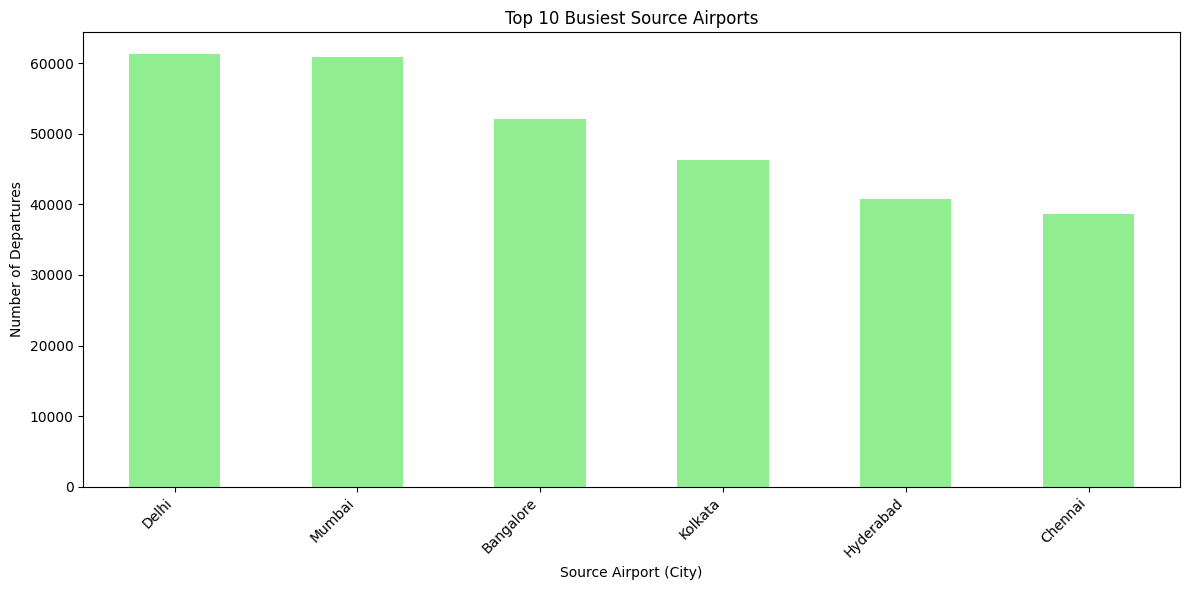

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Count departures from each source airport
Flights_data=pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv.csv")
top_sources = Flights_data['source_city'].value_counts().head(10)

print("Top 10 Busiest Source Airports:")
print(top_sources)

# Plot
plt.figure(figsize=(12,6))
top_sources.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Busiest Source Airports")
plt.xlabel("Source Airport (City)")
plt.ylabel("Number of Departures")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 3.2 Delay Heatmaps by Airport
- Heatmaps reveal which airports contribute most to different delay types
- They also show whether an airport’s delays are broad (all types) or concentrated in one cause

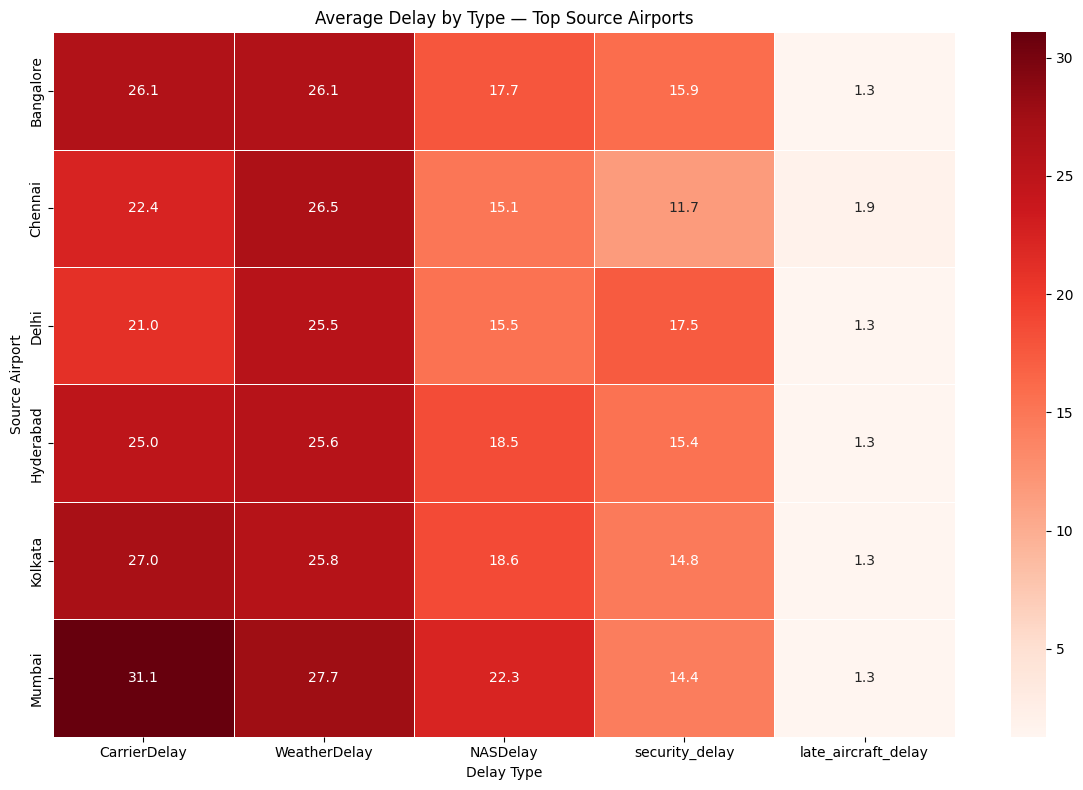

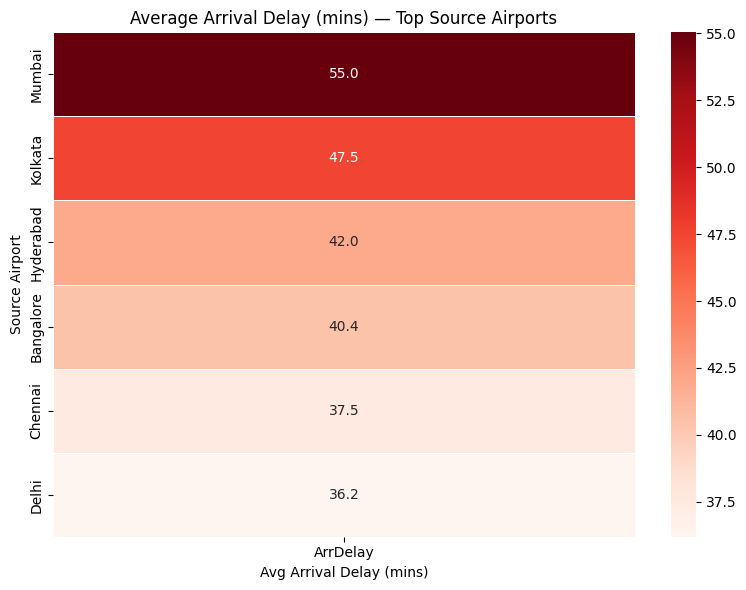

In [6]:

import seaborn as sns

# Copy (safe) and basic cleaning
df = Flights_data.copy()
delay_cols = ['CarrierDelay','WeatherDelay','NASDelay','security_delay','late_aircraft_delay']

# Replace missing delay values with 0
df[delay_cols] = df[delay_cols].fillna(0)

# Optional: focus on top N busiest airports to keep heatmap readable
top_n = 12
top_airports = df['source_city'].value_counts().head(top_n).index
df_top = df[df['source_city'].isin(top_airports)]

# 1) Airport vs Delay-Type heatmap (average minutes per delay type)
airport_delay_types = df_top.groupby('source_city')[delay_cols].mean()
plt.figure(figsize=(12,8))
sns.heatmap(airport_delay_types, annot=True, fmt='.1f', linewidths=0.4, cmap='Reds')
plt.title('Average Delay by Type — Top Source Airports')
plt.xlabel('Delay Type')
plt.ylabel('Source Airport')
plt.tight_layout()
plt.show()

# 2) Airport vs Avg Arrival Delay heatmap (single numeric column shown as heatmap)
airport_arr = df_top.groupby('source_city')['ArrDelay'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.heatmap(airport_arr.to_frame(), annot=True, fmt='.1f', linewidths=0.4, cmap='Reds')
plt.title('Average Arrival Delay (mins) — Top Source Airports')
plt.xlabel('Avg Arrival Delay (mins)')
plt.ylabel('Source Airport')
plt.tight_layout()
plt.show()


# Reasons 
- the Mumbai is having highest mins compare to other source cities

In [12]:
import pandas as pd

delay_cols = ['CarrierDelay','WeatherDelay','NASDelay','security_delay','late_aircraft_delay']

df = Flights_data.copy()
df[delay_cols] = df[delay_cols].fillna(0)
 

# Sort
airport_sorted = df.groupby('source_city')[delay_cols].mean().sort_values(by='CarrierDelay', ascending=False)

 

airport_sorted.head()


,CarrierDelay,WeatherDelay,NASDelay,security_delay,late_aircraft_delay
source_city,,,,,
Mumbai,31.070990,27.676038,22.275322,14.379187,1.326097
Kolkata,26.985954,25.759639,18.638812,14.769456,1.290698
Bangalore,26.127389,26.087532,17.722748,15.918768,1.315803
Hyderabad,24.992305,25.623046,18.526050,15.421433,1.315395
Chennai,22.377468,26.498114,15.088398,11.738036,1.921654


## 3.3 A ranked list of worst routes by Arrival Delay 

C:\Users\Rishik Reddy\AppData\Local\Temp\ipykernel_7496\2545013381.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst_routes.values, y=worst_routes.index, palette="Reds_r")


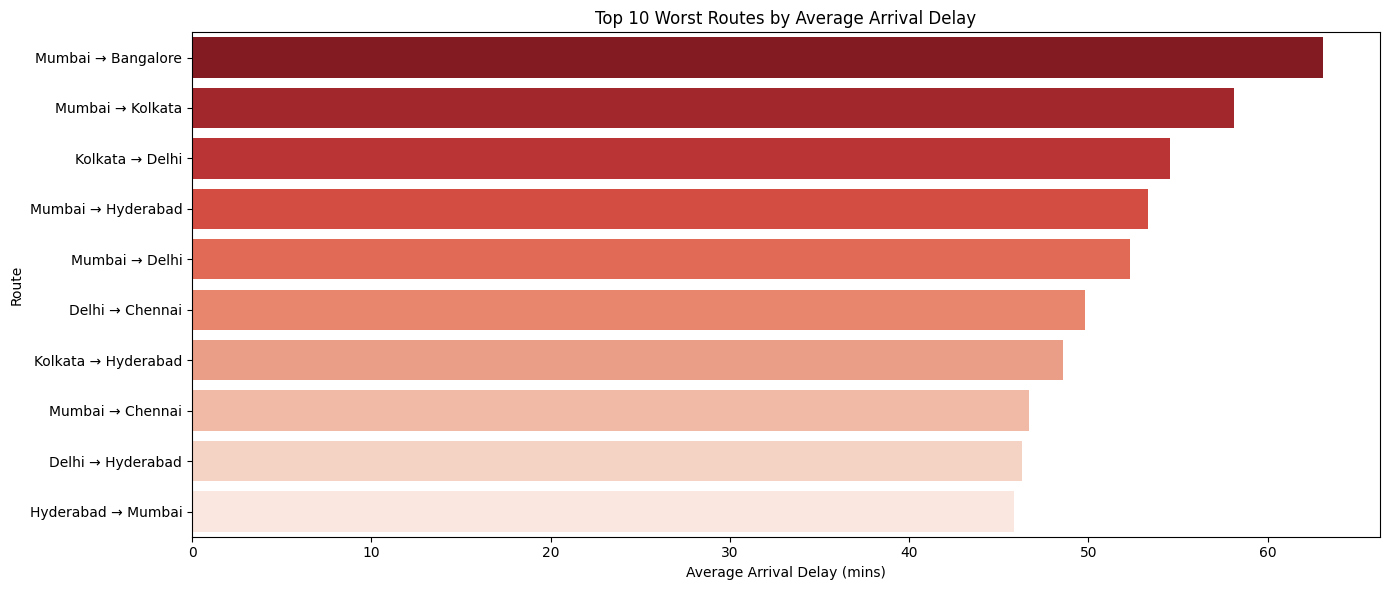

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = Flights_data.copy()

# Clean missing delays
df['ArrDelay'] = df['ArrDelay'].fillna(0)

# Create a route column
df['Route'] = df['source_city'] + " → " + df['destination_city']

# Calculate average arrival delay per route
route_delay = df.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False)

# Select top 10 worst routes
worst_routes = route_delay.head(10)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=worst_routes.values, y=worst_routes.index, palette="Reds_r")
plt.title("Top 10 Worst Routes by Average Arrival Delay")
plt.xlabel("Average Arrival Delay (mins)")
plt.ylabel("Route")
plt.tight_layout()
plt.show()


# Reason 
- why Mumbai to Bangalore will having highest arrival delay compare with other routes 

In [14]:
import pandas as pd

df = Flights_data.copy()

# Clean missing delays
df['ArrDelay'] = df['ArrDelay'].fillna(0)

# Create a Route column
df['Route'] = df['source_city'] + " → " + df['destination_city']

# Compute average arrival delay per route
route_delay = df.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False)

# Display top 10 worst routes
worst_routes = route_delay.head(10)
print("Top 10 Worst Routes (Highest Average Arrival Delay):")
print(worst_routes)


Top 10 Worst Routes (Highest Average Arrival Delay):
Route
Mumbai → Bangalore     63.103066
Mumbai → Kolkata       58.142596
Kolkata → Delhi        54.519417
Mumbai → Hyderabad     53.319962
Mumbai → Delhi         52.313053
Delhi → Chennai        49.816048
Kolkata → Hyderabad    48.576801
Mumbai → Chennai       46.706811
Delhi → Hyderabad      46.304352
Hyderabad → Mumbai     45.867548
Name: ArrDelay, dtype: float64


## 3.4 Route Congestion Score 


C:\Users\Rishik Reddy\AppData\Local\Temp\ipykernel_22440\426308804.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=congestion_sorted['CongestionScore'], y=congestion_sorted.index, palette='Reds')


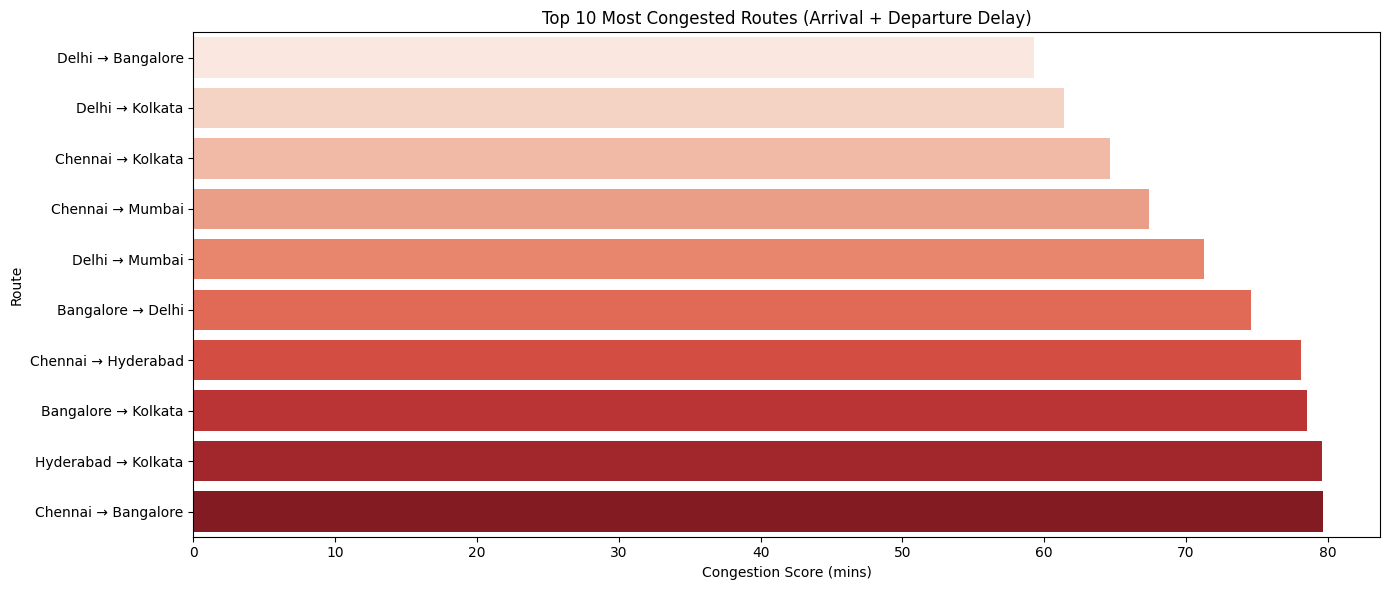

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Flights_data=pd.read_csv(r"C:\Users\Rishik Reddy\OneDrive\Desktop\AirData\DataSet\airlines_flights_data_cleaned_median.csv.csv")

df = Flights_data.copy()
df['ArrDelay'] = df['ArrDelay'].fillna(0)
df['DepDelay'] = df['DepDelay'].fillna(0)

df['Route'] = df['source_city'] + " → " + df['destination_city']

congestion = df.groupby('Route')[['ArrDelay','DepDelay']].mean()
congestion['CongestionScore'] = congestion['ArrDelay'] + congestion['DepDelay']

congestion_sorted = congestion.sort_values('CongestionScore').head(10)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=congestion_sorted['CongestionScore'], y=congestion_sorted.index, palette='Reds')
plt.title("Top 10 Most Congested Routes (Arrival + Departure Delay)")
plt.xlabel("Congestion Score (mins)")
plt.ylabel("Route")
plt.tight_layout()
plt.show()


# Reason 
- Why chennai to Bangalore & Hyderabad to Kolkata is having the highest congestion score compare with other cities routes. 

In [11]:
 

df = Flights_data.copy()
df['ArrDelay'] = df['ArrDelay'].fillna(0)
df['DepDelay'] = df['DepDelay'].fillna(0)

df['Route'] = df['source_city'] + " → " + df['destination_city']

# Compute congestion score
route_delay = df.groupby('Route')[['ArrDelay','DepDelay']].mean()
route_delay['Congestion Score'] = route_delay['ArrDelay'] + route_delay['DepDelay']

# Sort to find worst routes
worst_routes = route_delay.sort_values('Congestion Score').head(10)
print(worst_routes)


                      ArrDelay   DepDelay  Congestion Score
Route                                                      
Delhi → Bangalore    27.631173  31.651870         59.283043
Delhi → Kolkata      28.978884  32.418803         61.397687
Chennai → Kolkata    31.345697  33.312044         64.657740
Chennai → Mumbai     32.192332  35.214714         67.407046
Delhi → Mumbai       33.895153  37.392308         71.287462
Bangalore → Delhi    36.145682  38.465615         74.611297
Chennai → Hyderabad  38.009504  40.110929         78.120433
Bangalore → Kolkata  38.149880  40.399083         78.548963
Hyderabad → Kolkata  39.100413  40.504445         79.604858
Chennai → Bangalore  39.246419  40.447405         79.693824


## 3.5 Airport Delay Profile Comparison (Cluster Analysis) 

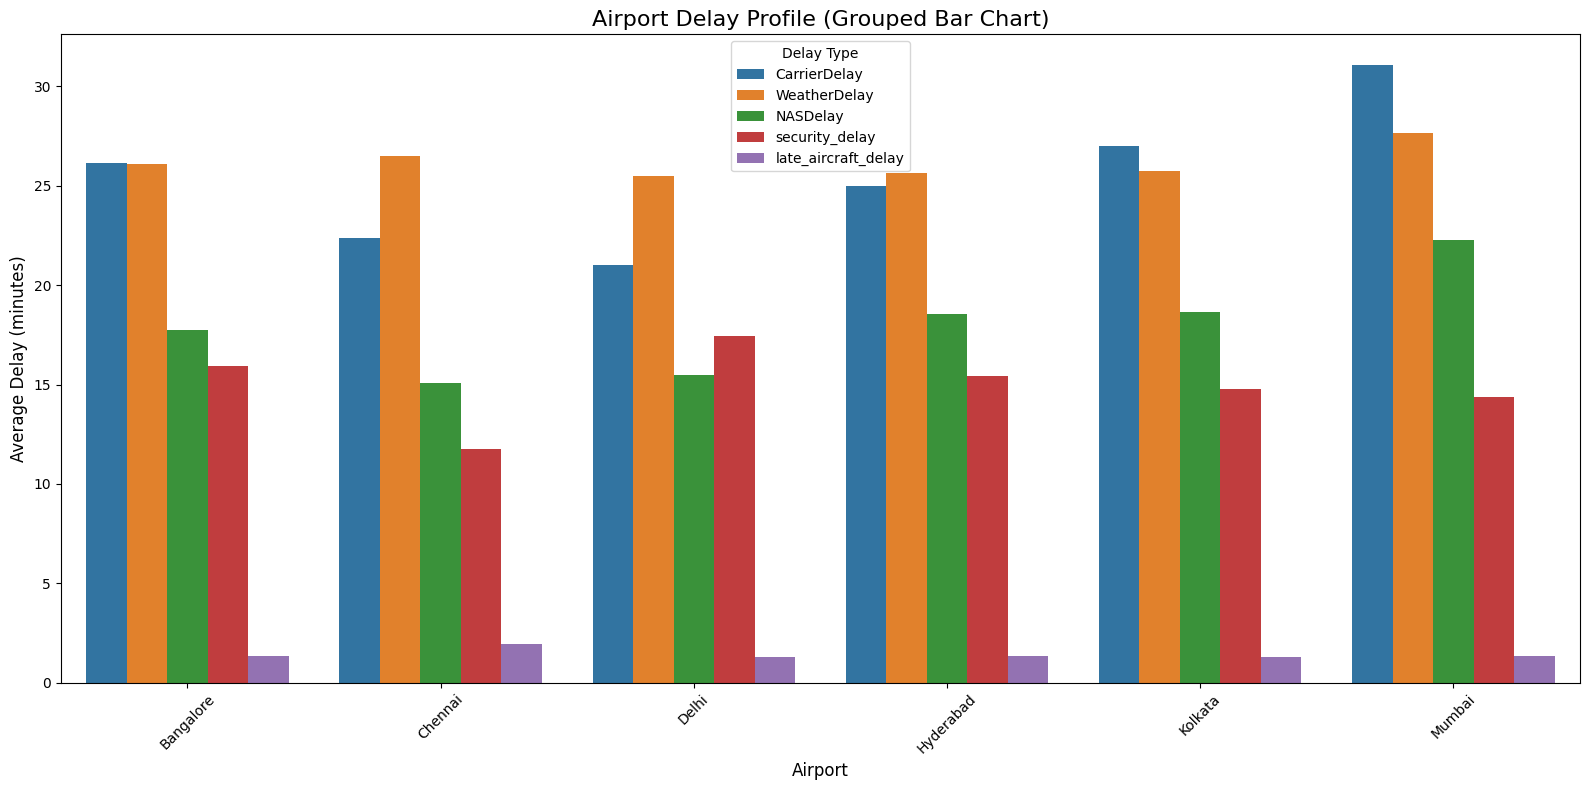

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = Flights_data.copy()

delay_cols = ['CarrierDelay','WeatherDelay','NASDelay','security_delay','late_aircraft_delay']
df[delay_cols] = df[delay_cols].fillna(0)

# Take top airports (by count) for clean visualization
top_airports = df['source_city'].value_counts().head(8).index
df_top = df[df['source_city'].isin(top_airports)]

# Compute average delay type per airport
airport_profile = df_top.groupby('source_city')[delay_cols].mean().reset_index()

# Melt for grouped bar plotting
airport_melt = airport_profile.melt(id_vars='source_city', 
                                    value_vars=delay_cols,
                                    var_name='DelayType', 
                                    value_name='DelayValue')

plt.figure(figsize=(16,8))
sns.barplot(data=airport_melt, x='source_city', y='DelayValue', hue='DelayType')

plt.title("Airport Delay Profile (Grouped Bar Chart)", fontsize=16)
plt.xlabel("Airport", fontsize=12)
plt.ylabel("Average Delay (minutes)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Delay Type')
plt.tight_layout()
plt.show()


## Reason 


In [31]:
df = Flights_data.copy()

delay_cols = ['CarrierDelay','WeatherDelay','NASDelay','security_delay','late_aircraft_delay']
df[delay_cols] = df[delay_cols].fillna(0)

airport_avg = df.groupby('source_city')[delay_cols].mean().round(2)

print("Average Delay by Airport:")
print(airport_avg)




Average Delay by Airport:
             CarrierDelay  WeatherDelay  NASDelay  security_delay  \
source_city                                                         
Bangalore           26.13         26.09     17.72           15.92   
Chennai             22.38         26.50     15.09           11.74   
Delhi               21.03         25.51     15.46           17.45   
Hyderabad           24.99         25.62     18.53           15.42   
Kolkata             26.99         25.76     18.64           14.77   
Mumbai              31.07         27.68     22.28           14.38   

             late_aircraft_delay  
source_city                       
Bangalore                   1.32  
Chennai                     1.92  
Delhi                       1.30  
Hyderabad                   1.32  
Kolkata                     1.29  
Mumbai                      1.33  


In [25]:
airport_avg['TotalDelay'] = airport_avg.sum(axis=1)

airport_total_sorted = airport_avg['TotalDelay'].sort_values(ascending=False)

print("\nTotal Delay per Airport (Highest to Lowest):")
print(airport_total_sorted)



Total Delay per Airport (Highest to Lowest):
source_city
Mumbai       96.74
Kolkata      87.45
Bangalore    87.18
Hyderabad    85.88
Delhi        80.75
Chennai      77.63
Name: TotalDelay, dtype: float64
